In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tikzplotlib
from scipy.optimize import curve_fit

plt.style.use('bmh')

def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

def save_fig(name, width='8cm', height='8cm'):
    fig = plt.gcf()
    tikzplotlib_fix_ncols(fig)

    tikzplotlib.clean_figure()
    tikzplotlib.save(name + '.tex', axis_width=width, axis_height=height)

In [61]:
# load the data from the 'TP_Laplace.xlsx' file
cour_cor = pd.read_excel('TP_Laplace.xlsx', sheet_name='Courant - correcte', header=None)
cour_cor = cour_cor.iloc[1:, 0:2].values
print(cour_cor)

[[-5 -3.3]
 [-4.5 -2.97]
 [-4 -2.65]
 [-3.5 -2.33]
 [-3 -2]
 [-2.5 -1.67]
 [-2 -1.34]
 [-1.5 -1.01]
 [-1 -0.66]
 [-0.5 -0.31]
 [0 0]
 [0.5 0.32]
 [1 0.65]
 [1.5 0.98]
 [2 1.3]
 [2.5 1.63]
 [3 1.95]
 [3.5 2.29]
 [4 2.6]
 [4.5 2.93]
 [5 3.26]]


In [62]:
# make the same extraction for the sheet 'Courant'
cour = pd.read_excel('TP_Laplace.xlsx', sheet_name='Courant', header=None)
cour = cour.iloc[1:, 0:2].values

# divide all the value of the first column by 10
cour[:, 0] = cour[:, 0] / 10

print(cour)

[[-0.5 -0.31]
 [-0.45 -0.29]
 [-0.4 -0.26]
 [-0.35 -0.24]
 [-0.3 -0.21]
 [-0.25 -0.16]
 [-0.2 -0.12]
 [-0.15 -0.1]
 [-0.1 -0.06]
 [-0.05 -0.02]
 [0.0 0]
 [0.05 0.03]
 [0.1 0.06]
 [0.15 0.09]
 [0.2 0.12]
 [0.25 0.16]
 [0.3 0.2]
 [0.35 0.22]
 [0.4 0.26]
 [0.45 0.29]
 [0.5 0.32]]


In [63]:
# make the same extraction for the sheet 'Longueur'
long = pd.read_excel('TP_Laplace.xlsx', sheet_name='Longueur', header=None)
long = long.iloc[1:, 0:3].values
print(long)

[[1.2 40 0.42]
 [2.2 37 0.89]
 [3.2 39 1.31]
 [4.2 38 1.74]
 [6.4 41 2.5]
 [8.4 42 3.26]]


In [64]:
# make the same extraction for the sheet 'Magn'
magn = pd.read_excel('TP_Laplace.xlsx', sheet_name='Magn', header=None)
magn = magn.iloc[1:, 0:2].values
print(magn)

[[1 0.76]
 [2 1.2]
 [3 1.84]
 [4 2.47]
 [5 3.24]
 [6 3.26]]


In [65]:
# make the same extraction for the sheet 'Angle'
angle = pd.read_excel('TP_Laplace.xlsx', sheet_name='Angle', header=None)
angle = angle.iloc[1:, 0:2].values
print(angle)

[[-90 -0.99]
 [-80 -0.97]
 [-70 -0.94]
 [-60 -0.85]
 [-50 -0.76]
 [-40 -0.64]
 [-30 -0.5]
 [-20 -0.35]
 [-10 -0.17]
 [0 0]
 [10 0.15]
 [20 0.32]
 [30 0.48]
 [40 0.62]
 [50 0.73]
 [60 0.83]
 [70 0.89]
 [80 0.92]
 [90 0.95]]


In [66]:
# for each list created above, make a third column with column * g
# where g is the acceleration of gravity
g = 9.81
cour_cor = np.append(cour_cor, cour_cor[:, 1].reshape(-1, 1) * g /1000, axis=1)
cour = np.append(cour, cour[:, 1].reshape(-1, 1) * g /1000, axis=1)
long = np.append(long, long[:, 2].reshape(-1, 1) * g /1000, axis=1)
magn = np.append(magn, magn[:, 1].reshape(-1, 1) * g /1000, axis=1)
angle = np.append(angle, angle[:, 1].reshape(-1, 1) * g /1000, axis=1)
print(cour_cor)
print(cour)
print(long)
print(magn)
print(angle)

[[-5 -3.3 -0.032373]
 [-4.5 -2.97 -0.029135700000000004]
 [-4 -2.65 -0.025996500000000002]
 [-3.5 -2.33 -0.0228573]
 [-3 -2 -0.019620000000000002]
 [-2.5 -1.67 -0.0163827]
 [-2 -1.34 -0.013145400000000002]
 [-1.5 -1.01 -0.009908100000000001]
 [-1 -0.66 -0.0064746000000000005]
 [-0.5 -0.31 -0.0030411]
 [0 0 0.0]
 [0.5 0.32 0.0031392000000000004]
 [1 0.65 0.006376500000000001]
 [1.5 0.98 0.009613799999999999]
 [2 1.3 0.012753000000000002]
 [2.5 1.63 0.0159903]
 [3 1.95 0.0191295]
 [3.5 2.29 0.0224649]
 [4 2.6 0.025506000000000004]
 [4.5 2.93 0.028743300000000003]
 [5 3.26 0.0319806]]
[[-0.5 -0.31 -0.0030411]
 [-0.45 -0.29 -0.0028449]
 [-0.4 -0.26 -0.0025506]
 [-0.35 -0.24 -0.0023544]
 [-0.3 -0.21 -0.0020600999999999996]
 [-0.25 -0.16 -0.0015696000000000002]
 [-0.2 -0.12 -0.0011772]
 [-0.15 -0.1 -0.000981]
 [-0.1 -0.06 -0.0005886]
 [-0.05 -0.02 -0.00019620000000000003]
 [0.0 0 0.0]
 [0.05 0.03 0.0002943]
 [0.1 0.06 0.0005886]
 [0.15 0.09 0.0008829]
 [0.2 0.12 0.0011772]
 [0.25 0.16 0.0015

In [67]:
# make a curve fit for each list between the first and the last column

f = lambda x, a: a * x
cour_cor_fit = curve_fit(f, cour_cor[:, 0], cour_cor[:, 2])
cour_fit = curve_fit(f, cour[:, 0], cour[:, 2])
long_fit = curve_fit(f, long[:, 0], long[:, 2])
magn_fit = curve_fit(f, magn[:, 0], magn[:, 2])

g = lambda x, a: a * np.sin(x)

# create a list with radian value for the angle
angle_p = angle[:, 0] * np.pi / 180
angle_fit = curve_fit(g, angle_p, angle[:, 2])

# make a list with cour and cour_cor
cour_all = np.append(cour_cor, cour, axis=0)
cour_all_fit = curve_fit(f, cour_all[:, 0], cour_all[:, 2])

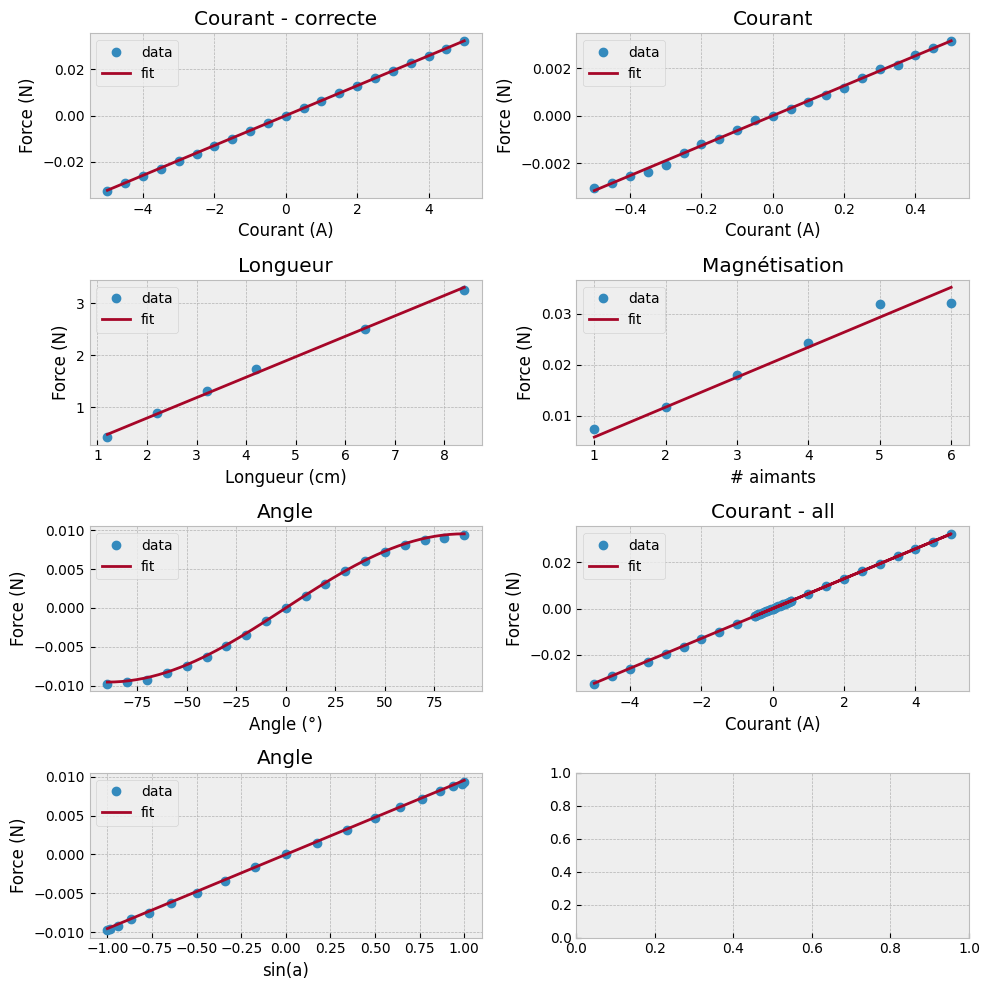

In [68]:
# plot the data and the curve fit for each list
figure, axes = plt.subplots(4, 2, figsize=(10, 10))
axes[0, 0].plot(cour_cor[:, 0], cour_cor[:, 2], 'o', label='data')
axes[0, 0].plot(cour_cor[:, 0], f(cour_cor[:, 0], cour_cor_fit[0]), label='fit')
axes[0, 0].set_title('Courant - correcte')
axes[0, 0].set_xlabel('Courant (A)')
axes[0, 0].set_ylabel('Force (N)')
axes[0, 0].legend()

axes[0, 1].plot(cour[:, 0], cour[:, 2], 'o', label='data')
axes[0, 1].plot(cour[:, 0], f(cour[:, 0], cour_fit[0]), label='fit')
axes[0, 1].set_title('Courant')
axes[0, 1].set_xlabel('Courant (A)')
axes[0, 1].set_ylabel('Force (N)')
axes[0, 1].legend()

axes[1, 0].plot(long[:, 0], long[:, 2], 'o', label='data')
axes[1, 0].plot(long[:, 0], f(long[:, 0], long_fit[0]), label='fit')
axes[1, 0].set_title('Longueur')
axes[1, 0].set_xlabel('Longueur (cm)')
axes[1, 0].set_ylabel('Force (N)')
axes[1, 0].legend()

axes[1, 1].plot(magn[:, 0], magn[:, 2], 'o', label='data')
axes[1, 1].plot(magn[:, 0], f(magn[:, 0], magn_fit[0]), label='fit')
axes[1, 1].set_title('Magnétisation')
axes[1, 1].set_xlabel('# aimants')
axes[1, 1].set_ylabel('Force (N)')
axes[1, 1].legend()

axes[2, 0].plot(angle[:, 0], angle[:, 2], 'o', label='data')
axes[2, 0].plot(np.linspace(-90,90), g(np.radians(np.linspace(-90,90)), angle_fit[0]), label='fit')
axes[2, 0].set_title('Angle')
axes[2, 0].set_xlabel('Angle (°)')
axes[2, 0].set_ylabel('Force (N)')
axes[2, 0].legend()

axes[2, 1].plot(cour_all[:, 0], cour_all[:, 2], 'o', label='data')
axes[2, 1].plot(cour_all[:, 0], f(cour_all[:, 0], cour_all_fit[0]), label='fit')
axes[2, 1].set_title('Courant - all')
axes[2, 1].set_xlabel('Courant (A)')
axes[2, 1].set_ylabel('Force (N)')
axes[2, 1].legend()

# plot the force as a function of the sine of the angle
axes[3, 0].plot(np.sin(angle_p.astype(float)), angle[:, 2], 'o', label='data')
axes[3, 0].plot(np.sin(np.radians(np.linspace(-90,90))), g(np.radians(np.linspace(-90,90)), angle_fit[0]), label='fit')
axes[3, 0].set_title('Angle')
axes[3, 0].set_xlabel('sin(a)')
axes[3, 0].set_ylabel('Force (N)')
axes[3, 0].legend()

plt.tight_layout()
plt.show()

In [69]:
# F = B * I * L => B = F / (I * L)
I = 5
L = 0.084
B = 3.26/1000 * 9.81 / (I * L)
B

0.0761442857142857

In [70]:
force = lambda i, l , b, a : i * l * b * np.sin(np.radians(a))

In [71]:
# write each list in a file ready to be used in a latex table
np.savetxt('cour_cor.txt', cour_cor, fmt='%1.3f', delimiter=' & ', newline=' \\\\\n')
np.savetxt('cour.txt', cour, fmt='%1.3f', delimiter=' & ', newline=' \\\\\n')
np.savetxt('long.txt', long, fmt='%1.3f', delimiter=' & ', newline=' \\\\\n')
np.savetxt('magn.txt', magn, fmt='%1.3f', delimiter=' & ', newline=' \\\\\n')
np.savetxt('angle.txt', angle, fmt='%1.3f', delimiter=' & ', newline=' \\\\\n')

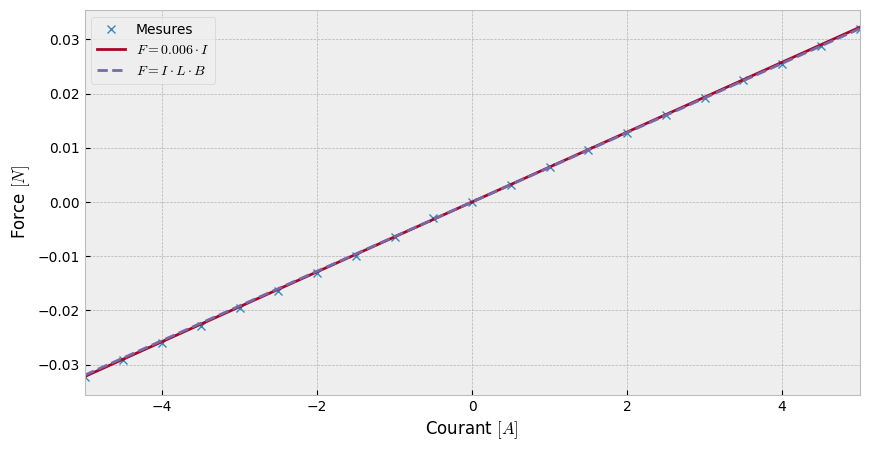

In [72]:
# plot cour_cor, the fit with the equation and the force calculated
plt.figure(figsize=(10, 5))
plt.plot(cour_cor[:, 0], cour_cor[:, 2], 'x', label='Mesures')
plt.plot(np.linspace(cour_cor[:, 0][0],cour_cor[:, 0][-1]), f(np.linspace(cour_cor[:, 0][0],cour_cor[:, 0][-1]), cour_cor_fit[0]), label=r'$F = {} \cdot I$'.format(round(cour_cor_fit[0][0], 3)))
plt.plot(np.linspace(cour_cor[:, 0][0],cour_cor[:, 0][-1]), force(np.linspace(cour_cor[:, 0][0],cour_cor[:, 0][-1]), L, B, 90), '--', label=r'$F = I \cdot L \cdot B$')
plt.xlabel(r'Courant $[A]$')
plt.ylabel(r'Force $[N]$')
plt.legend()
plt.xlim(cour_cor[:, 0][0],cour_cor[:, 0][-1])
save_fig('cour_cor', width='16cm', height='9cm')

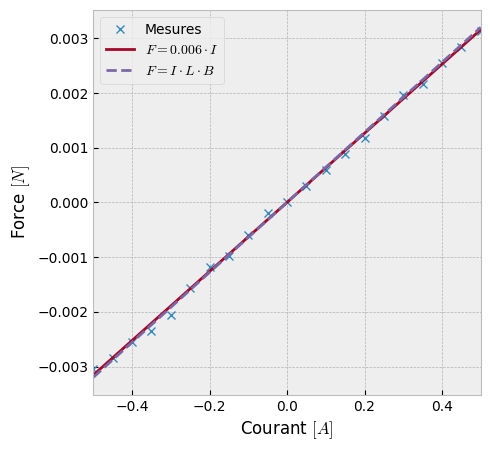

In [73]:
# plot cour, the fit with the equation and the force calculated
plt.figure(figsize=(5, 5))
plt.plot(cour[:, 0], cour[:, 2], 'x', label='Mesures')
plt.plot(np.linspace(cour[:, 0][0],cour[:, 0][-1]), f(np.linspace(cour[:, 0][0],cour[:, 0][-1]), cour_fit[0]), label=r'$F = {} \cdot I$'.format(round(cour_fit[0][0], 3)))
plt.plot(np.linspace(cour[:, 0][0],cour[:, 0][-1]), force(np.linspace(cour[:, 0][0],cour[:, 0][-1]), L, B, 90), '--', label=r'$F = I \cdot L \cdot B$')
plt.xlabel(r'Courant $[A]$')
plt.ylabel(r'Force $[N]$')
plt.legend()
plt.xlim(cour[:, 0][0],cour[:, 0][-1])
save_fig('cour', width='8cm', height='8cm')

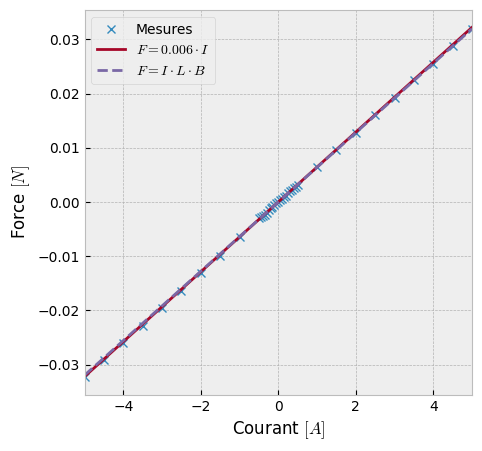

In [74]:
# plot cour_all, the fit with the equation and the force calculated
plt.figure(figsize=(5, 5))
plt.plot(cour_all[:, 0], cour_all[:, 2], 'x', label='Mesures')
plt.plot(np.linspace(cour_cor[:, 0][0],cour_cor[:, 0][-1]), f(np.linspace(cour_cor[:, 0][0],cour_cor[:, 0][-1]), cour_cor_fit[0]), label=r'$F = {} \cdot I$'.format(round(cour_cor_fit[0][0], 3)))
plt.plot(np.linspace(cour_cor[:, 0][0],cour_cor[:, 0][-1]), force(np.linspace(cour_cor[:, 0][0],cour_cor[:, 0][-1]), L, B, 90), '--', label=r'$F = I \cdot L \cdot B$')
plt.xlabel(r'Courant $[A]$')
plt.ylabel(r'Force $[N]$')
plt.legend()
plt.xlim(cour_cor[:, 0][0],cour_cor[:, 0][-1])
save_fig('cour_all', width='8cm', height='8cm')

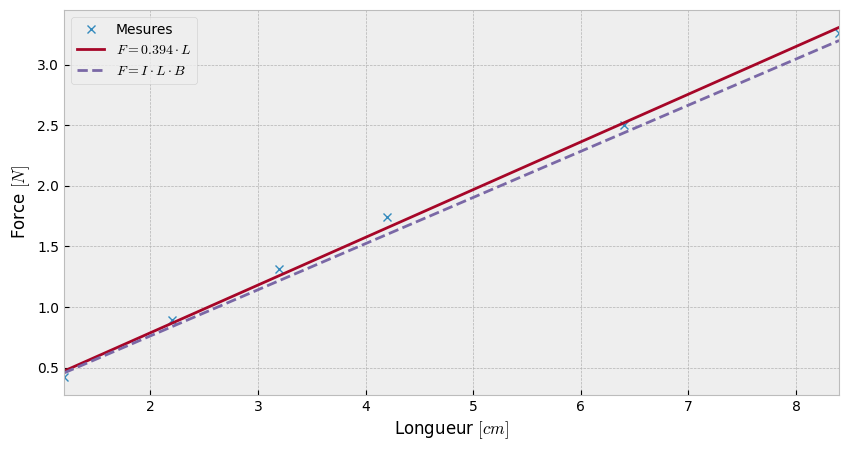

In [75]:
# plot long, the fit with the equation and the force calculated
plt.figure(figsize=(10, 5))
plt.plot(long[:, 0], long[:, 2], 'x', label='Mesures')
plt.plot(np.linspace(long[:, 0][0],long[:, 0][-1]), f(np.linspace(long[:, 0][0],long[:, 0][-1]), long_fit[0]), label=r'$F = {} \cdot L$'.format(round(long_fit[0][0], 3)))
plt.plot(np.linspace(long[:, 0][0],long[:, 0][-1]), force(I, np.linspace(long[:, 0][0],long[:, 0][-1]), B, 90), '--', label=r'$F = I \cdot L \cdot B$')
plt.xlabel(r'Longueur $[cm]$')
plt.ylabel(r'Force $[N]$')
plt.legend()
plt.xlim(long[:, 0][0],long[:, 0][-1])
save_fig('long', width='16cm', height='9cm')

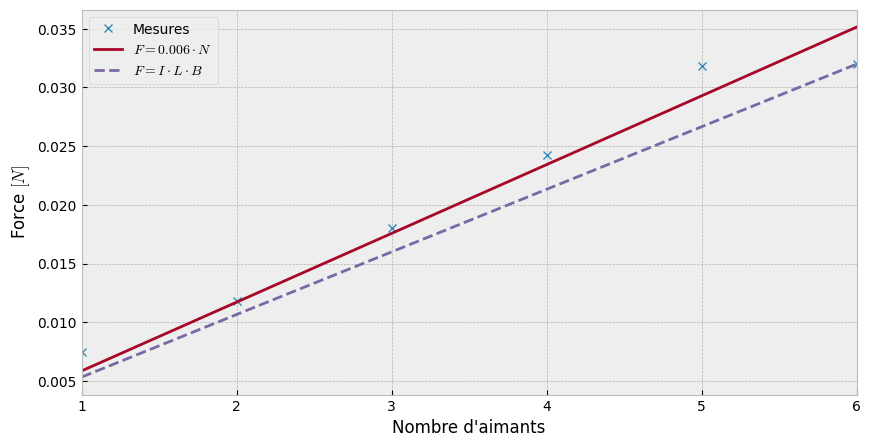

In [76]:
# plot magn, the fit with the equation and the force calculated
plt.figure(figsize=(10, 5))
plt.plot(magn[:, 0], magn[:, 2], 'x', label='Mesures')
plt.plot(np.linspace(magn[:, 0][0],magn[:, 0][-1]), f(np.linspace(magn[:, 0][0],magn[:, 0][-1]), magn_fit[0]), label=r'$F = {} \cdot N$'.format(round(magn_fit[0][0], 3)))
plt.plot(np.linspace(magn[:, 0][0],magn[:, 0][-1]), force(I, L, B/6 * np.linspace(magn[:, 0][0],magn[:, 0][-1]), 90), '--', label=r'$F = I \cdot L \cdot B$')
plt.xlabel(r"Nombre d'aimants")
plt.ylabel(r'Force $[N]$')
plt.legend()
plt.xlim(magn[:, 0][0],magn[:, 0][-1])
save_fig('magn', width='16cm', height='9cm')

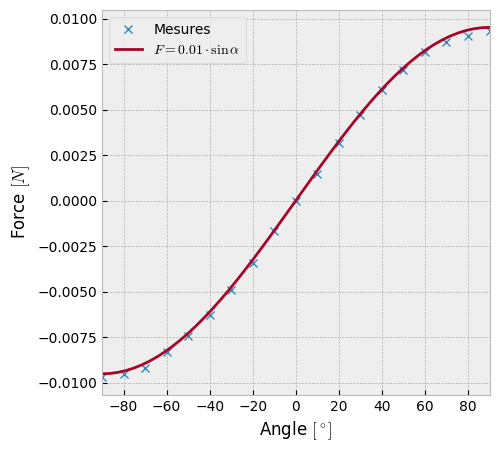

In [77]:
# plot angle, the fit with the equation and the force calculated
plt.figure(figsize=(5, 5))
plt.plot(angle[:, 0], angle[:, 2], 'x', label='Mesures')
plt.plot(np.linspace(angle[:, 0][0],angle[:, 0][-1]), g(np.radians(np.linspace(angle[:, 0][0],angle[:, 0][-1])), angle_fit[0]), label=r'$F = {} \cdot \sin \alpha$'.format(round(angle_fit[0][0], 3)))
plt.xlabel(r'Angle $[^\circ]$')
plt.ylabel(r'Force $[N]$')
plt.legend()
plt.xlim(angle[:, 0][0],angle[:, 0][-1])
save_fig('angle', width='8cm', height='8cm')

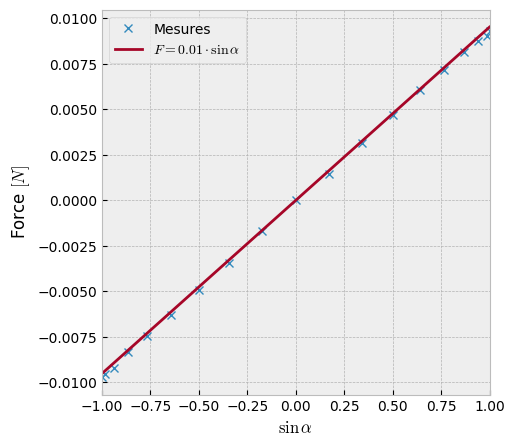

In [78]:
# plot angle, the fit with the equation
# but make the x axis as the sine of the angle
plt.figure(figsize=(5, 5))
plt.plot(np.sin(np.radians(angle[:, 0].astype(float))), angle[:, 2], 'x', label='Mesures')
plt.plot(np.sin(np.radians(np.linspace(angle[:, 0][0],angle[:, 0][-1]))), g(np.radians(np.linspace(angle[:, 0][0],angle[:, 0][-1])), angle_fit[0]), label=r'$F = {} \cdot \sin \alpha$'.format(round(angle_fit[0][0], 3)))
plt.xlabel(r'$\sin \alpha$')
plt.ylabel(r'Force $[N]$')
plt.legend()
plt.xlim(np.sin(np.radians(angle[:, 0][0])),np.sin(np.radians(angle[:, 0][-1])))
save_fig('angle_sin', width='8cm', height='8cm')